## 4차 과제 - Hyperparameter Tuning을 해보자
- 주제: 하이퍼파라미터 튜닝 기법 학습
- 데이터: The History of Baseball(Pitching Data) https://www.kaggle.com/datasets/seanlahman/the-history-of-baseball?select=pitching.csv
- 사용 라이브러리: pandas, numpy, matplotlib, sklearn, imblearn, bayes_opt

### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, SMOTE, train_test_split, RandomForestClassifier, RandomizedSearchCV, GridSearchCV, BayesianOptimization, accuracy_score

In [1]:
import numpy as np
import pandas as pd

1.2 데이터를 불러오고 info()를 통해 데이터를 살펴보세요.

In [2]:
train=pd.read_csv('pitching.csv')

In [3]:
train

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,AL,11,6,34,18,0,...,0.0,5.0,0.0,0,500.0,3.0,44,4.0,2.0,NaN
44135,zieglbr01,2015,1,ARI,NL,0,3,66,0,0,...,3.0,2.0,1.0,0,263.0,46.0,17,1.0,0.0,NaN
44136,zimmejo02,2015,1,WAS,NL,13,10,33,33,0,...,3.0,2.0,8.0,1,831.0,0.0,89,8.0,2.0,NaN
44137,zitoba01,2015,1,OAK,AL,0,0,3,2,0,...,0.0,0.0,0.0,0,37.0,1.0,8,0.0,0.0,NaN


In [4]:
#playerID       Player ID code
#yearID         Year
#stint          player's stint (order of appearances within a season)
#teamID         Team
#lgID           League
#W              Wins
#L              Losses
#G              Games
#GS             Games Started
#CG             Complete Games 
#SHO            Shutouts
#SV             Saves
#IPOuts         Outs Pitched (innings pitched x 3)
#H              Hits
#ER             Earned Runs
#HR             Homeruns
#BB             Walks
#SO             Strikeouts
#BAOpp          Opponent's Batting Average
#ERA            Earned Run Average
#IBB            Intentional Walks
#WP             Wild Pitches
#HBP            Batters Hit By Pitch
#BK             Balks
#BFP            Batters faced by Pitcher
#GF             Games Finished
#R              Runs Allowed
#SH             Sacrifices by opposing batters
#SF             Sacrifice flies by opposing batters
#GIDP           Grounded into double plays by opposing batter

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44139 entries, 0 to 44138
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   player_id  44139 non-null  object 
 1   year       44139 non-null  int64  
 2   stint      44139 non-null  int64  
 3   team_id    44139 non-null  object 
 4   league_id  44008 non-null  object 
 5   w          44139 non-null  int64  
 6   l          44139 non-null  int64  
 7   g          44139 non-null  int64  
 8   gs         44139 non-null  int64  
 9   cg         44139 non-null  int64  
 10  sho        44139 non-null  int64  
 11  sv         44139 non-null  int64  
 12  ipouts     44138 non-null  float64
 13  h          44139 non-null  int64  
 14  er         44139 non-null  int64  
 15  hr         44139 non-null  int64  
 16  bb         44139 non-null  int64  
 17  so         44139 non-null  int64  
 18  baopp      42614 non-null  float64
 19  era        44049 non-null  float64
 20  ibb   

1.3 null 값이 있는 컬럼은 모두 삭제하겠습니다(원래는 다른 처리를 해야 하지만 컬럼 수는 충분하니까..ㅎㅎ 야구 잘 몰라서 그런 거 아닙니다.).

In [6]:
train.dropna(axis=1,inplace=True)

In [7]:
train.columns

Index(['player_id', 'year', 'stint', 'team_id', 'w', 'l', 'g', 'gs', 'cg',
       'sho', 'sv', 'h', 'er', 'hr', 'bb', 'so', 'bk', 'r'],
      dtype='object')

1.4 연도 별로 몇개의 데이터가 있는 지 확인 후 데이터가 얼마 없는 과거 데이터는 삭제하겠습니다. 이를 위해 연도 별 데이터 수를 계산하고 line plot으로 그리세요.

<Axes: xlabel='year', ylabel='Number of Records'>

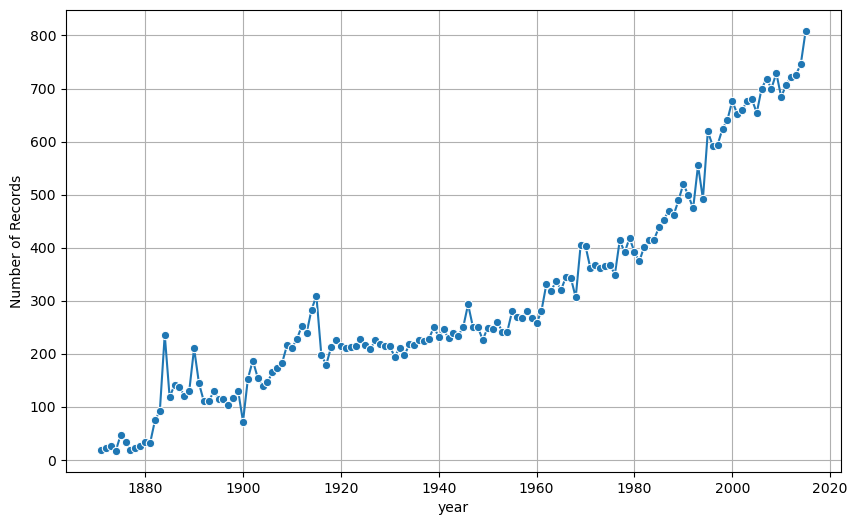

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.xlabel('year')
plt.ylabel('Number of Records')
plt.grid()
sns.lineplot(x=train['year'].unique(),y=train['year'].value_counts(sort=False),marker='o')

1.5 보다 최신 분석을 위해 1980년 이후의 데이터만 남기고 몇개의 데이터가 남았는지 확인하세요.

In [9]:
train=train[train['year']>=1980]

In [10]:
train

,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.6 reset_index()를 통해 재배열하세요.

In [11]:
train.reset_index(inplace=True)

In [12]:
train

,index,player_id,year,stint,team_id,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,22982,aasedo01,1980,1,CAL,8,13,40,21,5,1,2,193,79,13,66,74,1,83
1,22983,abbotgl01,1980,1,SEA,12,12,31,31,7,2,0,228,98,27,49,78,1,110
2,22984,alexado01,1980,1,ATL,14,11,35,35,7,1,0,227,108,20,74,114,0,120
3,22985,allarbr01,1980,1,TEX,0,1,5,2,0,0,0,13,9,0,10,10,0,13
4,22986,allenne01,1980,1,NYN,7,10,59,0,0,0,22,87,40,7,40,79,1,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21152,44134,youngch03,2015,1,KCA,11,6,34,18,0,0,0,91,42,16,43,83,0,44
21153,44135,zieglbr01,2015,1,ARI,0,3,66,0,0,0,30,48,14,3,17,36,0,17
21154,44136,zimmejo02,2015,1,WAS,13,10,33,33,0,0,0,204,82,24,39,164,1,89
21155,44137,zitoba01,2015,1,OAK,0,0,3,2,0,0,0,12,8,4,6,2,0,8


1.7 투수의 승리 수를 예측해보겠습니다. w 컬럼의 value를 확인해보세요.

In [13]:
train['w'].value_counts()

w
0     5854
1     3197
2     2356
3     1744
4     1453
5     1114
6      878
7      730
9      560
8      557
10     450
11     434
12     384
13     317
14     287
15     242
16     193
17     125
18     102
19      61
20      53
21      32
22      17
24       8
23       7
25       1
27       1
Name: count, dtype: int64

1.8 0승 투수(출전하지 않은 경우도 존재)가 많으므로 승리 수가 0인 데이터는 삭제하겠습니다.

In [14]:
train=train[train['w']>0]

In [15]:
train['w'].count()

15303

1.9 Regression이 아닌 Classification으로 분석해보겠습니다. 이를 위해 10을 기준으로 w를 10승 이상이면 1, 10승 미만이면 0인 Binary 형태로 변환하세요.

In [16]:
train.loc[train['w'] < 10, 'w'] = 0
train.loc[train['w'] >= 10, 'w'] = 1

1.10 value_counts()를 통해 잘 나눠졌는지 확인해보세요.

In [17]:
train['w'].value_counts()

w
0    12589
1     2714
Name: count, dtype: int64

1.11 종속 변수의 밸런스가 맞지 않는 것으로 확인됩니다. 이를 해결하기 위해 Under Sampling 혹은 Over Sampling 기법을 사용할 수 있는데 Under Sampling의 경우 데이터가 많지 않는 상황에서 사라지는 데이터가 과도하게 많으므로 Over Sampling 기법 중 SMOTE 기법을 사용해보겠습니다. 사용하기 전에 player_id, year, team_id 컬럼은 지우고 가겠습니다.

In [18]:
train.drop(axis=1,columns='player_id',inplace=True)
train.drop(axis=1,columns='year',inplace=True)
train.drop(axis=1,columns='team_id',inplace=True)

C:\Users\yeonn\AppData\Local\Temp\ipykernel_29980\4144338324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(axis=1,columns='player_id',inplace=True)
C:\Users\yeonn\AppData\Local\Temp\ipykernel_29980\4144338324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(axis=1,columns='year',inplace=True)
C:\Users\yeonn\AppData\Local\Temp\ipykernel_29980\4144338324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t

In [19]:
train

,index,stint,w,l,g,gs,cg,sho,sv,h,er,hr,bb,so,bk,r
0,22982,1,0,13,40,21,5,1,2,193,79,13,66,74,1,83
1,22983,1,1,12,31,31,7,2,0,228,98,27,49,78,1,110
2,22984,1,1,11,35,35,7,1,0,227,108,20,74,114,0,120
4,22986,1,0,10,59,0,0,0,22,87,40,7,40,79,1,43
6,22988,1,0,8,35,14,0,0,2,132,53,8,43,75,0,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21147,44129,1,0,5,12,9,0,0,0,52,30,9,18,26,0,30
21148,44130,1,0,4,16,9,0,0,0,67,33,12,27,52,0,38
21151,44133,1,0,0,20,0,0,0,0,23,18,10,7,21,0,18
21152,44134,1,1,6,34,18,0,0,0,91,42,16,43,83,0,44


1.12 SMOTE 기법을 활용해 w의 balance를 맞추세요(sampling_strategy='auto', random_state = 123).

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
sm= SMOTE(sampling_strategy='auto',random_state=123)

In [23]:
test=train['w']
train=train.drop(columns='w',axis=1)

In [24]:
os_train,os_test =sm.fit_resample(train,test)

1.13 balance가 잘 맞춰졌는지 확인하세요.

In [25]:
os_test.value_counts()

w
0    12589
1    12589
Name: count, dtype: int64

1.14 SMOTE의 동작 방식에 대해 작성하고 Over Sampling의 장/단점에 대해 작성하세요.

오버샘플링 방식으로 소수 데이터중 가장 잔차가 작은 데이터를 가져온 다음 난수를 곱해서 추가한다.
언더샘플링과 다르게 중요한 데이터를 제거하지 않는다.
새로운 특성을 추가할때는 어려움을 보인다

1.15 다른 Over Sampling 기법들엔 어떤 것들이 있는지 작성하세요(2개 이상).

ADASYN (Adaptive Synthetic Sampling):
ADASYN은 SMOTE의 확장된 버전으로, 소수 클래스 샘플에 대한 이웃의 밀도(density)를 고려하여 샘플을 생성

SMOTE-NC (SMOTE for Nominal and Continuous Features):

SMOTE-NC는 범주형(categorical) 및 연속형(continuous) 특성을 모두 고려하는 SMOTE의 확장된 버전

### 2. 예측 및 분석

2.1 본격적으로 분석을 진행하겠습니다. 본 차시는 Hyperparameter Tuning에 대해 학습하는 것이 목적이므로 모델은 RandomForest Classifier 하나만 사용하도록 하겠습니다. 먼저 데이터를 train, validation, test 3개로 나누세요(trian-60%, val-20%, test-20%).

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [27]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

In [28]:
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train,test_size=0.25)

2.2 train test에 validation set을 추가하는 이유가 뭔지 작성하세요.

검증데이터를 확보해서 파라미터와 유효성을 파악하기 위해

2.3 Randomized SearchCV로 최적의 파라미터 셋을 찾으세요(성능 지표는 accuracy score).

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [30]:
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [31]:
rf= RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

In [35]:
rand_clf=RandomizedSearchCV(rf,parameters,scoring='accuracy')
rand_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미터 :',rand_clf.best_params_)
print('최적 정확도 :',rand_clf.best_score_)
best_dclf=rand_clf.best_estimator_
dpredictions =best_dclf.predict(X_val)
accuracy=accuracy_score(y_val,dpredictions)
print(f'테스트 세트에서의 randomforest 정확도:{accuracy}')

최적 하이퍼 파라미터 : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
최적 정확도 : 0.9424885819567045
테스트 세트에서의 randomforest 정확도:0.943155831427638


2.4 위에서 지정한 hyperparameter들이 각각 무엇을 의미하는지 작성하세요.

n_estimators:
랜덤 포레스트에서 생성할 의사결정 트리의 개수
값이 클수록 더 많은 트리를 사용하여 앙상블이 강력해지지만, 학습 시간이 늘어날 수 있음
max_depth:
각 의사결정 트리의 최대 깊이를 지정
트리의 깊이가 깊어질수록 모델이 더 복잡해지지만, 과적합(overfitting)의 위험이 있음
min_samples_split:
노드를 분할하기 위해 필요한 최소 샘플 수를 지정
이 값을 높게 설정하면 노드가 더 적게 분할되어 모델이 단순해지고 과적합을 줄일 수 있음
min_samples_leaf:
리프 노드가 되기 위해 필요한 최소 샘플 수를 지정
이 값을 높게 설정하면 리프 노드의 순도가 높아지고 과적합을 줄일 수 있음.
bootstrap:
데이터를 무작위로 샘플링할지 여부를 지정
True로 설정하면 부트스트래핑(bootstrap sampling)을 사용하여 데이터를 샘플링
criterion:
트리의 분할 기준을 지정
'gini'는 지니 불순도(Gini impurity), 'entropy'는 정보 이득(Information gain)을 사용

2.5 Grid SearchCV로 최적의 파라미터 셋을 찾으세요.

In [32]:
grid_dclf=GridSearchCV(rf,param_grid=parameters,scoring='accuracy')
grid_dclf.fit(X_train,y_train)
print('최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('최적 정확도 :',grid_dclf.best_score_)

최적 하이퍼 파라미터 : {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
최적 정확도 : 0.9435778472763326


NameError: name 'accuracy_score' is not defined

In [33]:
best_dclf=grid_dclf.best_estimator_
dpredictions =best_dclf.predict(X_val)
accuracy=accuracy_score(y_val,dpredictions)
print(f'테스트 세트에서의 randomforest 정확도:{accuracy}')

테스트 세트에서의 randomforest 정확도:0.9405423064358053


2.6 Randomized SearchCV와 Grid SearchCV의 차이와 장단점에 대해 설명하세요.

<figure>
    <img src="https://miro.medium.com/v2/resize:fit:781/1*8uSZqUSGa-UGF-0CDBd4Jw.png">
</figure>

Randomized SearchCV는 하이퍼파라미터 탐색 공간에서 임의의 조합을 선택하여 탐색합니다. 따라서 그리드 탐색보다 무작위성이 높다.

Grid SearchCV는 보다 체계적이고 완전한 탐색을 수행하지만, 계산 비용이 높고 최적의 조합을 찾는 데 시간이 오래 걸릴 수 있다. Randomized SearchCV는 보다 효율적인 무작위 탐색을 수행하여 계산 비용을 줄이지만, 최적의 조합을 찾는 데 정확성과 일관성이 낮을 수 있다.

2.7 이번엔 Bayesian Optimization을 사용해 파라미터 튜닝을 진행해보겠습니다.

In [36]:
pip install scikit-optimize

  Obtaining dependency information for scikit-optimize from https://files.pythonhosted.org/packages/90/0e/15deb91b3db0003843e34e72fa865e1d92013781d986fdc65483c99a9f69/scikit_optimize-0.10.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyaml>=16.9 from https://files.pythonhosted.org/packages/25/ec/8aaf0d127751f84d8b10395fe47def9ac3552990b70abffdd92714836d39/pyaml-23.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/107.7 kB ? eta -:--:--
   --------------- ------------------------ 41.0/107.7 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 107.7/107.7 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
from skopt import BayesSearchCV

In [38]:
Bayes_clf=BayesSearchCV(rf,parameters,scoring='accuracy')
Bayes_clf.fit(X_train,y_train)
print('최적 하이퍼 파라미터 :',Bayes_clf.best_params_)
print('최적 정확도 :',Bayes_clf.best_score_)
best_dclf=Bayes_clf.best_estimator_
dpredictions =best_dclf.predict(X_val)
accuracy=accuracy_score(y_val,dpredictions)
print(f'테스트 세트에서의 randomforest 정확도:{accuracy}')

최적 하이퍼 파라미터 : OrderedDict([('bootstrap', True), ('criterion', 'gini'), ('max_depth', None), ('min_samples_leaf', 4), ('min_samples_split', 2), ('n_estimators', 200)])
최적 정확도 : 0.9430331849669645
테스트 세트에서의 randomforest 정확도:0.9411956876837635


2.8 진행한 튜닝 과정에서 찾은 최적의 파라미터 셋으로 다시 학습을 진행한 후 최종 accuracy score을 출력하세요.

In [42]:
rand_param=rand_clf.best_estimator_
grid_param=grid_dclf.best_estimator_
bayes_param=Bayes_clf.best_estimator_

In [43]:
dpredictions1 =rand_param.predict(X_val)
dpredictions2 =grid_param.predict(X_val)
dpredictions3 =bayes_param.predict(X_val)

In [45]:
print(f'randcv: {accuracy_score(y_val,dpredictions1)}')
print(f'gridcv: {accuracy_score(y_val,dpredictions2)}')
print(f'bayescv: {accuracy_score(y_val,dpredictions3)}')

randcv: 0.943155831427638
gridcv: 0.9405423064358053
bayescv: 0.9411956876837635


### 3. 자유분석

최적의 파라미터 셋을 찾고 성능을 높여보세요.

In [47]:
pip install optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/15/da/68883911855d8b4d521f9a370e4e6aab8232b91c1d8d5a8348c4680c6642/optuna-3.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for Mako from https://files.pythonhosted.org/packages/2b/8d/9f11d0b9ac521febb806e7f30dc5982d0f4f5821217712c59005fbc5c1e3/Mako-1.3.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/380.1 kB ? eta -:--:--
   ------------------ --------------------- 174.1/380.1 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 380.1/3

In [48]:
import optuna

In [50]:
# Objective 함수 정의
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 1, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    
    # RandomForestClassifier 모델 생성
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        bootstrap=bootstrap, 
        criterion=criterion,
    )
    
    # 모델을 사용하여 학습 및 평가
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

In [52]:
study = optuna.create_study(direction='maximize')  
study.optimize(objective,n_trials=100)

[I 2024-04-05 17:21:04,545] A new study created in memory with name: no-name-044486e6-630d-48ef-99d6-c02166f53c20
[I 2024-04-05 17:21:05,181] Trial 0 finished with value: 0.9415223783077425 and parameters: {'n_estimators': 85, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 3, 'bootstrap': True, 'criterion': 'entropy'}. Best is trial 0 with value: 0.9415223783077425.
[I 2024-04-05 17:21:05,308] Trial 1 finished with value: 0.9425024501796798 and parameters: {'n_estimators': 20, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 1 with value: 0.9425024501796798.
[I 2024-04-05 17:21:06,202] Trial 2 finished with value: 0.9438092126755963 and parameters: {'n_estimators': 114, 'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'gini'}. Best is trial 2 with value: 0.9438092126755963.
[I 2024-04-05 17:21:08,122] Trial 3 finished with value: 0.9411956876837635 and para

In [53]:
print(study.best_trial.params)

{'n_estimators': 59, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False, 'criterion': 'entropy'}


In [59]:
rf_optuna=RandomForestClassifier(n_estimators= 59, max_depth= 16,
                                  min_samples_split= 6, min_samples_leaf= 3,
                                  bootstrap= False, criterion= 'entropy')
rf_optuna.fit(X_train,y_train)
dpredictions4=rf_optuna.predict(X_val)

In [67]:
print(f'randcv: {accuracy_score(y_val,dpredictions1)}')
print(f'gridcv: {accuracy_score(y_val,dpredictions2)}')
print(f'bayescv: {accuracy_score(y_val,dpredictions3)}')
print(f'optuna: {accuracy_score(y_val,dpredictions4)}')

randcv: 0.943155831427638
gridcv: 0.9405423064358053
bayescv: 0.9411956876837635
optuna: 0.942829140803659


In [68]:
train=pd.read_csv('pitching.csv')

In [69]:
train.dropna(axis=1,inplace=True)

In [70]:
train=train[train['year']>=1980]

In [71]:
train.loc[train['w'] < 10, 'w'] = 0
train.loc[train['w'] >= 10, 'w'] = 1

In [72]:
train.drop(axis=1,columns='player_id',inplace=True)
train.drop(axis=1,columns='year',inplace=True)
train.drop(axis=1,columns='team_id',inplace=True)

In [73]:
test=train['w']
train=train.drop(columns='w',axis=1)

In [75]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2)

RandomForestClassifier(bootstrap=False, min_samples_leaf=4, min_samples_split=5)

In [79]:
rand_param.fit(X_train,y_train)
dpredictions1=rand_param.predict(X_test)

In [83]:
grid_param.fit(X_train,y_train)
dpredictions2=grid_param.predict(X_test)
bayes_param.fit(X_train,y_train)
dpredictions3=bayes_param.predict(X_test)

In [89]:
rf_optuna.fit(X_train,y_train)
dpredictions4=rf_optuna.predict(X_test)

In [90]:
print(f'randcv: {accuracy_score(y_test,dpredictions1)}')
print(f'gridcv: {accuracy_score(y_test,dpredictions2)}')
print(f'bayescv: {accuracy_score(y_test,dpredictions3)}')
print(f'optuna: {accuracy_score(y_test,dpredictions4)}')

randcv: 0.9565217391304348
gridcv: 0.9560491493383743
bayescv: 0.956758034026465
optuna: 0.9572306238185255


Optuna 으로 하는게 좋은거 같다..!(test_val에서 2등,test에서 1등 정확도)